# Lithology Predictions using ML

Lithology is an important factor in the exploration, drilling and production of oil and gas resources. Understanding the type and properties of the rocks and minerals in a specific area can provide valuable information about the location and size of oil and gas reservoirs, as well as the potential for recovery of these resources. This information is critical in determining the feasibility and potential success of oil and gas projects.


Column Descriptions
1. WELL - Well identifier
2. DEPTH_MD - Measured depth along the wellbore
3. X_LOC, Y_LOC, Z_LOC - Spatial coordinates (x, y, z) of the well location
4. GROUP - Geological group or formation
5. FORMATION - Specific geological formation
6. CALI - Caliper log (measure of wellbore diameter)
7. RSHA - Shear wave acoustic impedance
8. RMED - Median resistivity
9. RDEP - Deep resistivity
10. RHOB - Bulk density
11. GR - Gamma ray log (measure of radioactivity)
12. SGR - Specific gamma ray log
13. NPHI - Neutron porosity log
14. PEF - Photoelectric factor log
15. DTC - Compressional wave sonic log
16. SP - Spontaneous potential log
17. BS - Bit size
18. ROP - Rate of penetration (drilling speed)
19. DTS - Drilling time log
20. DCAL - Drilling caliper log
21. DRHO - Drilling density log
22. MUDWEIGHT - Mud weight (density of drilling fluid)
23. RMIC - Micron resistivity log
24. ROPA - Rate of penetration (average)
25. RXO - Rotor x-axis orientation
28. LITH - Lithology (rock type)


**

# Project Objective

- In this project, we are going to train a Machine learning model with features of a Well to predict the type of rock (lithology) in the Reservoir at a particular Depth.
- From the data provided, Lithology column is our target column

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the data

data = pd.read_csv('xeek_subset.csv')

In [3]:
# display the first five rows of the data
data.head().style.background_gradient(cmap='cool')

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,LITH
0,15/9-13,494.528000,437641.968800,6470972.500000,-469.501831,NORDLAND GP.,nan,19.480835,nan,1.611410,1.798681,1.884186,80.200851,nan,nan,20.915468,161.131180,24.612379,nan,34.636410,nan,nan,-0.574928,nan,nan,nan,nan,Shale
1,15/9-13,494.680000,437641.968800,6470972.500000,-469.653809,NORDLAND GP.,nan,19.468800,nan,1.618070,1.795641,1.889794,79.262886,nan,nan,19.383013,160.603470,23.895531,nan,34.636410,nan,nan,-0.570188,nan,nan,nan,nan,Shale
2,15/9-13,494.832000,437641.968800,6470972.500000,-469.805786,NORDLAND GP.,nan,19.468800,nan,1.626459,1.800733,1.896523,74.821999,nan,nan,22.591518,160.173615,23.916357,nan,34.779556,nan,nan,-0.574245,nan,nan,nan,nan,Shale
3,15/9-13,494.984000,437641.968800,6470972.500000,-469.957794,NORDLAND GP.,nan,19.459282,nan,1.621594,1.801517,1.891913,72.878922,nan,nan,32.191910,160.149429,23.793688,nan,39.965164,nan,nan,-0.586315,nan,nan,nan,nan,Shale
4,15/9-13,495.136000,437641.968800,6470972.500000,-470.109772,NORDLAND GP.,nan,19.453100,nan,1.602679,1.795299,1.880034,71.729141,nan,nan,38.495632,160.128342,24.104078,nan,57.483765,nan,nan,-0.597914,nan,nan,nan,nan,Shale


In [4]:
# display the last five rows of the data
data.tail()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,LITH
133193,16/2-16,2207.310396,476770.1250,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,NaN,5.382444,...,8.5,22.291321,NaN,NaN,0.107520,NaN,NaN,NaN,NaN,Sandstone
133194,16/2-16,2207.462396,476770.1563,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,NaN,5.651109,...,8.5,22.230320,NaN,NaN,0.101821,NaN,NaN,NaN,NaN,Sandstone
133195,16/2-16,2207.614396,476770.1563,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,NaN,5.870602,...,8.5,22.388054,NaN,NaN,0.097832,NaN,NaN,NaN,NaN,Sandstone
133196,16/2-16,2207.766396,476770.1563,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,NaN,5.756996,...,8.5,23.331690,NaN,NaN,0.092334,NaN,NaN,NaN,NaN,Sandstone
133197,16/2-16,2207.918396,476770.1563,6523587.5,-2181.534424,ROTLIEGENDES GP.,Skagerrak Fm.,8.732694,NaN,5.544824,...,8.5,24.340328,NaN,NaN,0.090736,NaN,NaN,NaN,NaN,Sandstone


In [5]:
# check the shape of the data
data.shape

(133198, 28)

- The data has 133198 rows and 30 columns

In [6]:
# check the columns
data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'LITH'],
      dtype='object')

In [7]:
# the every information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 28 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   WELL       133198 non-null  object 
 1   DEPTH_MD   133198 non-null  float64
 2   X_LOC      125805 non-null  float64
 3   Y_LOC      125805 non-null  float64
 4   Z_LOC      125805 non-null  float64
 5   GROUP      133198 non-null  object 
 6   FORMATION  111632 non-null  object 
 7   CALI       133006 non-null  float64
 8   RSHA       62039 non-null   float64
 9   RMED       125556 non-null  float64
 10  RDEP       125805 non-null  float64
 11  RHOB       108053 non-null  float64
 12  GR         133198 non-null  float64
 13  SGR        17350 non-null   float64
 14  NPHI       91725 non-null   float64
 15  PEF        100840 non-null  float64
 16  DTC        132635 non-null  float64
 17  SP         93680 non-null   float64
 18  BS         97529 non-null   float64
 19  ROP        130454 non-n

- Data types:
    - float64 = 24
    - object = 4

In [8]:
# select numerical columns from the data
num_col = data.select_dtypes(exclude='object').columns
print(num_col)

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS',
       'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO'],
      dtype='object')


In [9]:
# select categorical columns from the data
cat_col = data.select_dtypes(include='object').columns
print(cat_col)

Index(['WELL', 'GROUP', 'FORMATION', 'LITH'], dtype='object')


In [10]:
## add num form of the target column
data['LITH_codes'] = data['LITH'].astype('category').cat.codes

- Since the target column, Lithology is categorical column, we have to convert it to numerical or create num. column for it.

### Check missing values

In [11]:
# print sum of missing values in each column
data.isna().sum()

WELL               0
DEPTH_MD           0
X_LOC           7393
Y_LOC           7393
Z_LOC           7393
GROUP              0
FORMATION      21566
CALI             192
RSHA           71159
RMED            7642
RDEP            7393
RHOB           25145
GR                 0
SGR           115848
NPHI           41473
PEF            32358
DTC              563
SP             39518
BS             35669
ROP             2744
DTS           121014
DCAL           76998
DRHO           27659
MUDWEIGHT      31554
RMIC          131563
ROPA          119725
RXO            94252
LITH               0
LITH_codes         0
dtype: int64

- There a lots missing values in the dataset, therefore we can not drop nan.

- But we are going to replace nan with the median of the values in numerical columns and replace nan with mode in categorical columns.

In [12]:
# check percentage of missing values in each column
(data.isna().sum()/len(data))*100

WELL           0.000000
DEPTH_MD       0.000000
X_LOC          5.550384
Y_LOC          5.550384
Z_LOC          5.550384
GROUP          0.000000
FORMATION     16.190934
CALI           0.144146
RSHA          53.423475
RMED           5.737323
RDEP           5.550384
RHOB          18.877911
GR             0.000000
SGR           86.974279
NPHI          31.136353
PEF           24.293158
DTC            0.422679
SP            29.668614
BS            26.778931
ROP            2.060091
DTS           90.852716
DCAL          57.807174
DRHO          20.765327
MUDWEIGHT     23.689545
RMIC          98.772504
ROPA          89.884983
RXO           70.760822
LITH           0.000000
LITH_codes     0.000000
dtype: float64

- Drop columns that have missing values greater than or equal to 50% of the len(data)
  - The following columns have missing values >= 50%
  -
        * RXO 
        * ROPA 
        * RMIC 
        * DCAL 
        * DTS 
        * SGR 
        * RSHA

In [13]:
# check duplicate values
duplicate_values = data.duplicated()
print(duplicate_values.sum())

0


In [14]:
# check the descriptive statistic of the data
data.describe().style.background_gradient(cmap='Blues')

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,LITH_codes
count,133198.000000,125805.000000,125805.000000,125805.000000,133006.000000,62039.000000,125556.000000,125805.000000,108053.000000,133198.000000,17350.000000,91725.000000,100840.000000,132635.000000,93680.000000,97529.000000,130454.000000,12184.000000,56200.000000,105539.000000,101644.000000,1635.000000,13473.000000,38946.000000,133198.000000
mean,1792.944663,451235.640861,6471391.931640,-1719.214522,13.199399,10.561825,1.708851,1.743774,2.199556,69.553872,59.813135,0.355602,4.511845,122.700286,91.608922,12.194539,28.163816,176.583712,0.972165,0.009307,2.291368,2.568148,25.253839,-112.944168,7.748352
std,739.441515,15299.395264,30944.486918,740.536678,3.561386,116.359983,9.127200,13.233330,0.236902,39.328728,25.538669,0.143857,5.092807,34.234879,98.781404,3.143410,45.592228,44.358622,43.000304,0.067312,17.882420,2.261201,14.319902,333.547482,2.075712
min,415.261599,436790.843800,6429286.500000,-3246.156250,5.946157,0.130193,-0.008419,0.123068,1.366913,0.109284,-196.869995,-0.023143,1.010027,7.415132,-2.199269,8.500000,0.018832,93.068260,-12.215459,-1.795894,0.125818,0.362225,0.556113,-999.900024,0.000000
25%,1182.822400,437640.781300,6453743.000000,-2334.161865,11.381848,0.759227,0.779763,0.777323,2.029237,43.244637,41.281138,0.234927,2.857540,87.899776,48.808243,8.500000,9.650485,149.754013,0.007800,-0.007736,0.137800,1.387308,14.260232,0.537328,7.000000
50%,1747.524496,444152.093800,6463019.000000,-1626.893433,12.698571,0.997515,1.095681,1.130621,2.162121,66.266132,62.973612,0.382014,3.780121,135.968094,70.282761,12.250001,22.362363,162.537949,0.415419,0.003215,0.152180,2.133351,24.598738,0.879455,9.000000
75%,2413.874901,460442.093800,6478963.000000,-1119.113525,14.944049,1.450392,1.535653,1.644573,2.404375,93.808681,73.933750,0.480985,5.098502,147.388626,92.173889,12.250001,35.444058,190.082294,1.118416,0.022928,0.168955,2.860770,33.749100,1.519061,9.000000
max,3272.024000,476770.156300,6539631.000000,-375.251495,25.717396,2193.904541,1796.209106,1856.935059,3.115611,804.298950,152.516830,0.817310,365.575592,230.432953,526.547302,26.000002,2224.647461,377.327789,10006.789060,0.433157,185.730927,23.590172,86.378632,2000.000000,10.000000


# Exploratory Data Analysis

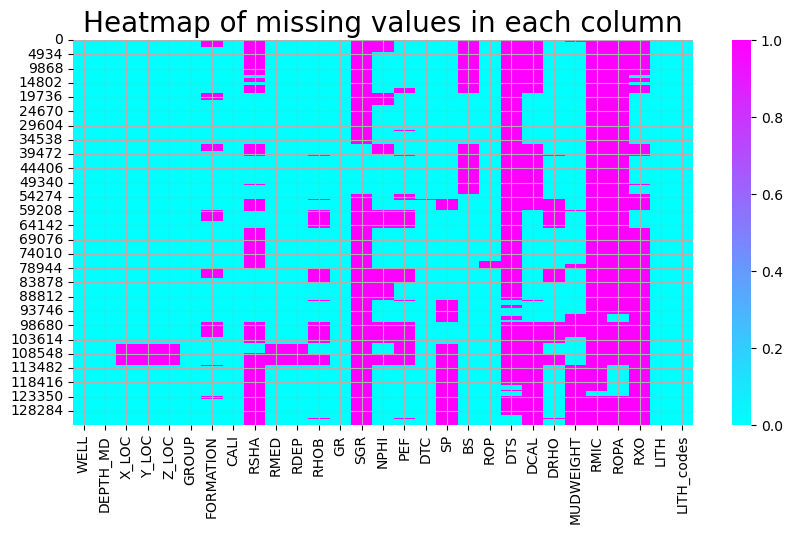

In [15]:
# visualize the missing data
plt.figure(figsize=(10,5))
sns.heatmap(data.isna(),cmap='cool')
plt.title("Heatmap of missing values in each column",fontsize=20)
plt.savefig("lith_missing")
plt.grid('on')
plt.show()

- From the above heatmap:
    - The missing values are indicated by pink color in the heatmap.

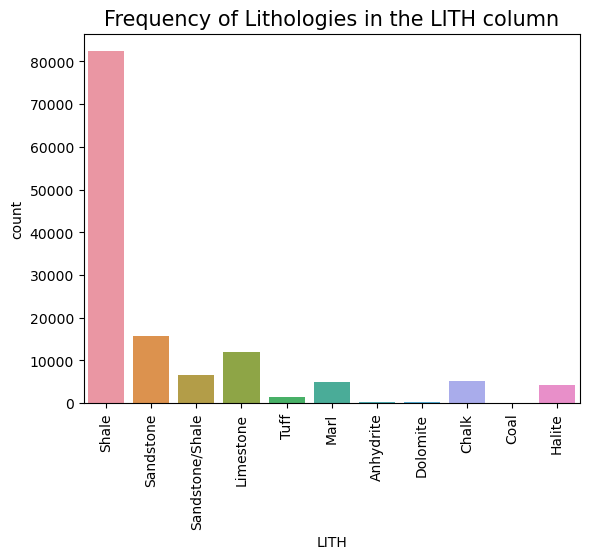

In [16]:
# visualize the target column
sns.countplot(x='LITH',data=data)
plt.xticks(rotation=90)
plt.title("Frequency of Lithologies in the LITH column",fontsize=(15))
plt.show()

- Shale has the highest number of appearance, followed by Sandstone and so on
- Coal, Anhydrite and Dolomite has lowest frequency.
    * Machine learning model that can control this imbalance of data should be used.

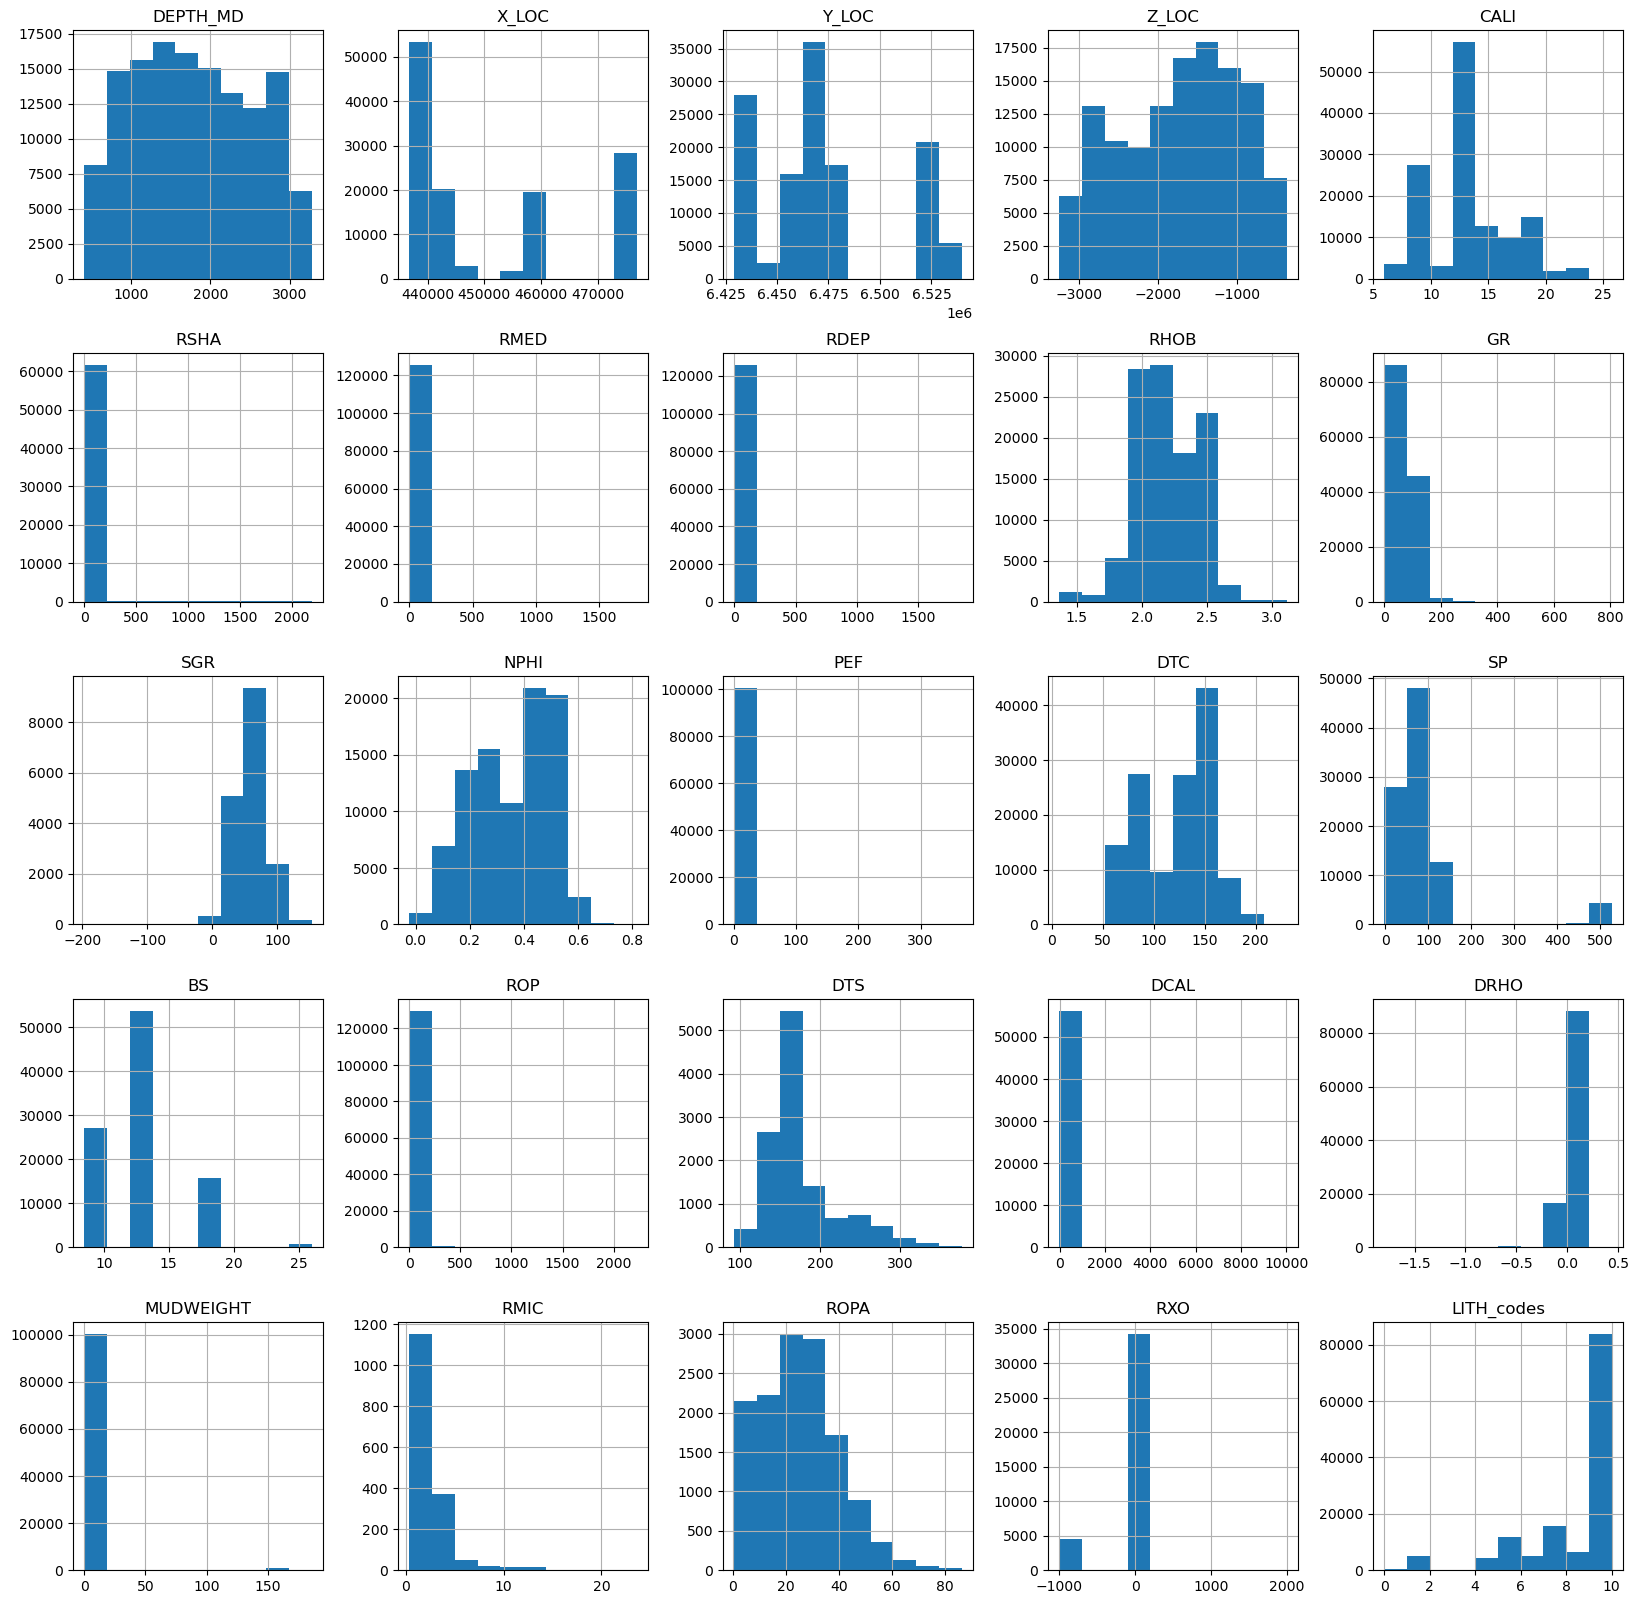

In [17]:
# Distribution of the numerical features in the data
num_cols = data.select_dtypes(exclude='object')
plt.style.use('default')
num_cols.hist(figsize=[20,20])
plt.interactive(True)
#plt.tight_layout()
plt.show()

- From the above plots:
    - All the data in each column is not normally distributed

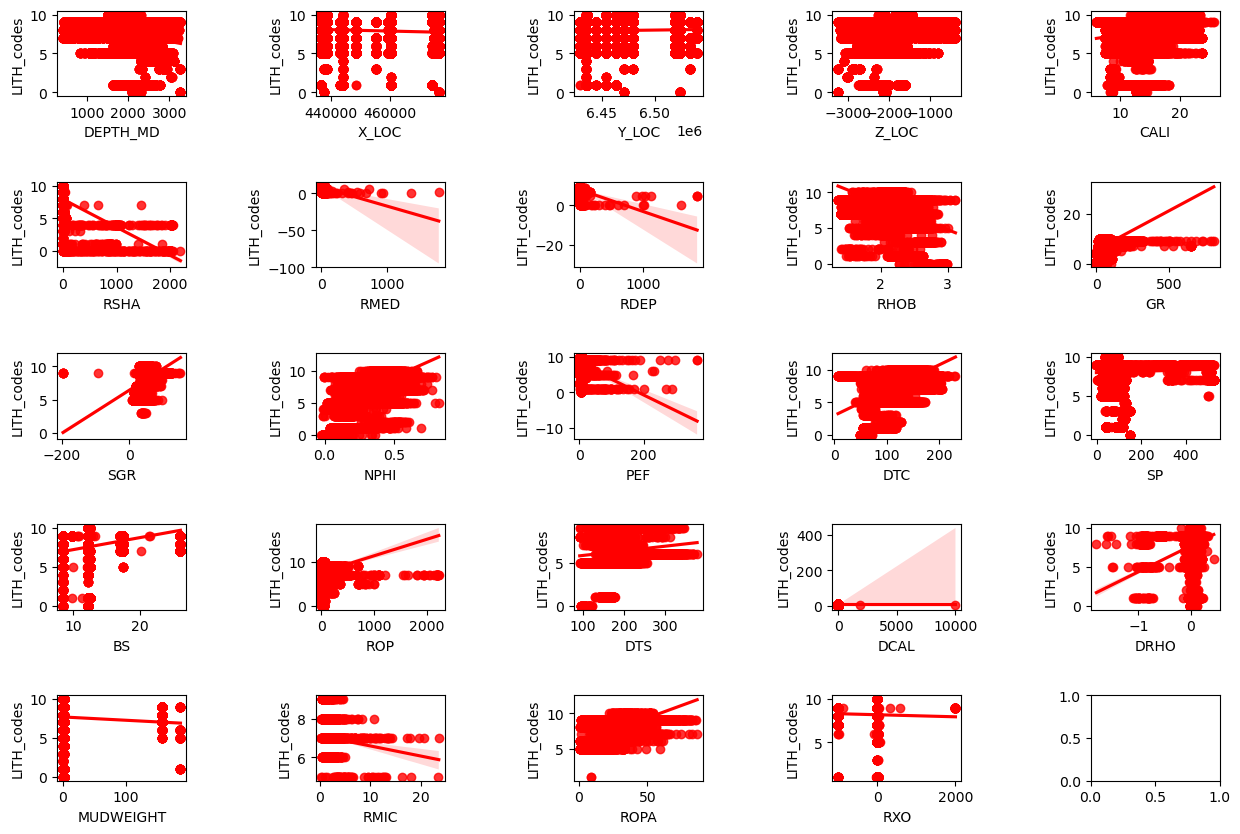

In [18]:
# scatterplot to visualize the relationship between target and feature columns
num_col = ['DEPTH_MD', 'X_LOC', 'Y_LOC','Z_LOC' ,'CALI', 'RSHA','RMED', 'RDEP', 'RHOB','GR', 'SGR','NPHI', 'PEF',
           'DTC', 'SP', 'BS', 'ROP','DTS','DCAL', 'DRHO', 'MUDWEIGHT',
          'RMIC', 'ROPA','RXO',]

fig,ax =plt.subplots(5,5, figsize=(15,10))

for idx, num_col in enumerate(num_col):
    row, col = idx //5, idx % 5
    sns.regplot(x=num_col,y=data['LITH_codes'] ,data=data, ax=ax[row,col],color='red')
    plt.interactive(True)
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

- From the above plots:
    - The relationship between the LITH_codes and features are not clearly visible. It means the relationship is very tiny, so we need to use correlation plots to understand it well.

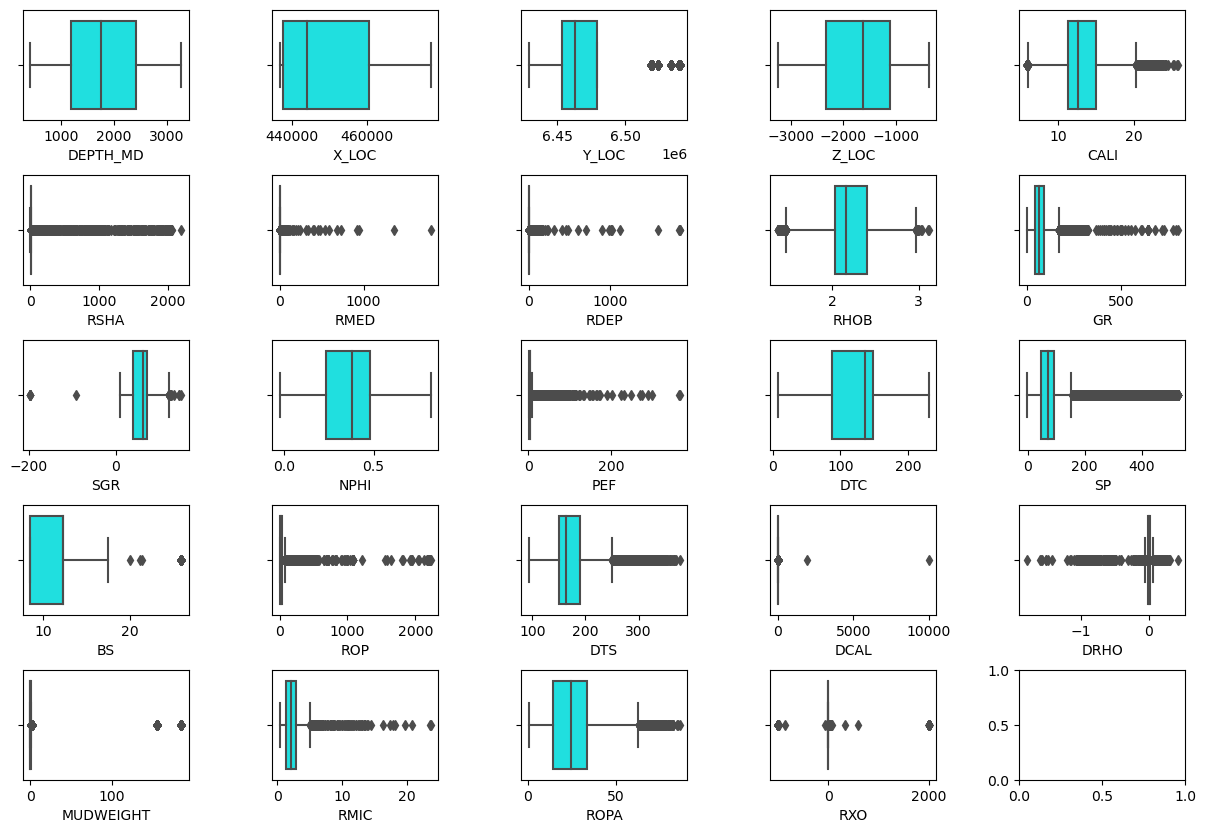

In [19]:
# boxplot of the columns in the dataset 
num_col = ['DEPTH_MD', 'X_LOC', 'Y_LOC','Z_LOC' ,'CALI', 'RSHA','RMED', 'RDEP', 'RHOB','GR', 'SGR','NPHI', 'PEF',
           'DTC', 'SP', 'BS', 'ROP','DTS','DCAL', 'DRHO', 'MUDWEIGHT',
          'RMIC', 'ROPA','RXO',]

fig,ax =plt.subplots(5,5, figsize=(15,10))
for idx, num_col in enumerate(num_col):
    row, col = idx //5, idx % 5
    sns.boxplot(x=num_col ,data=data, ax=ax[row,col],color='cyan')
    plt.interactive(True)
    
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

- There are a lot of outliers in the data which needs to be treated:
- Only DEPTH_MD, X_LOC, DTC, BS,NPHI, CALI, RHOB and Z_LOC has no outlier

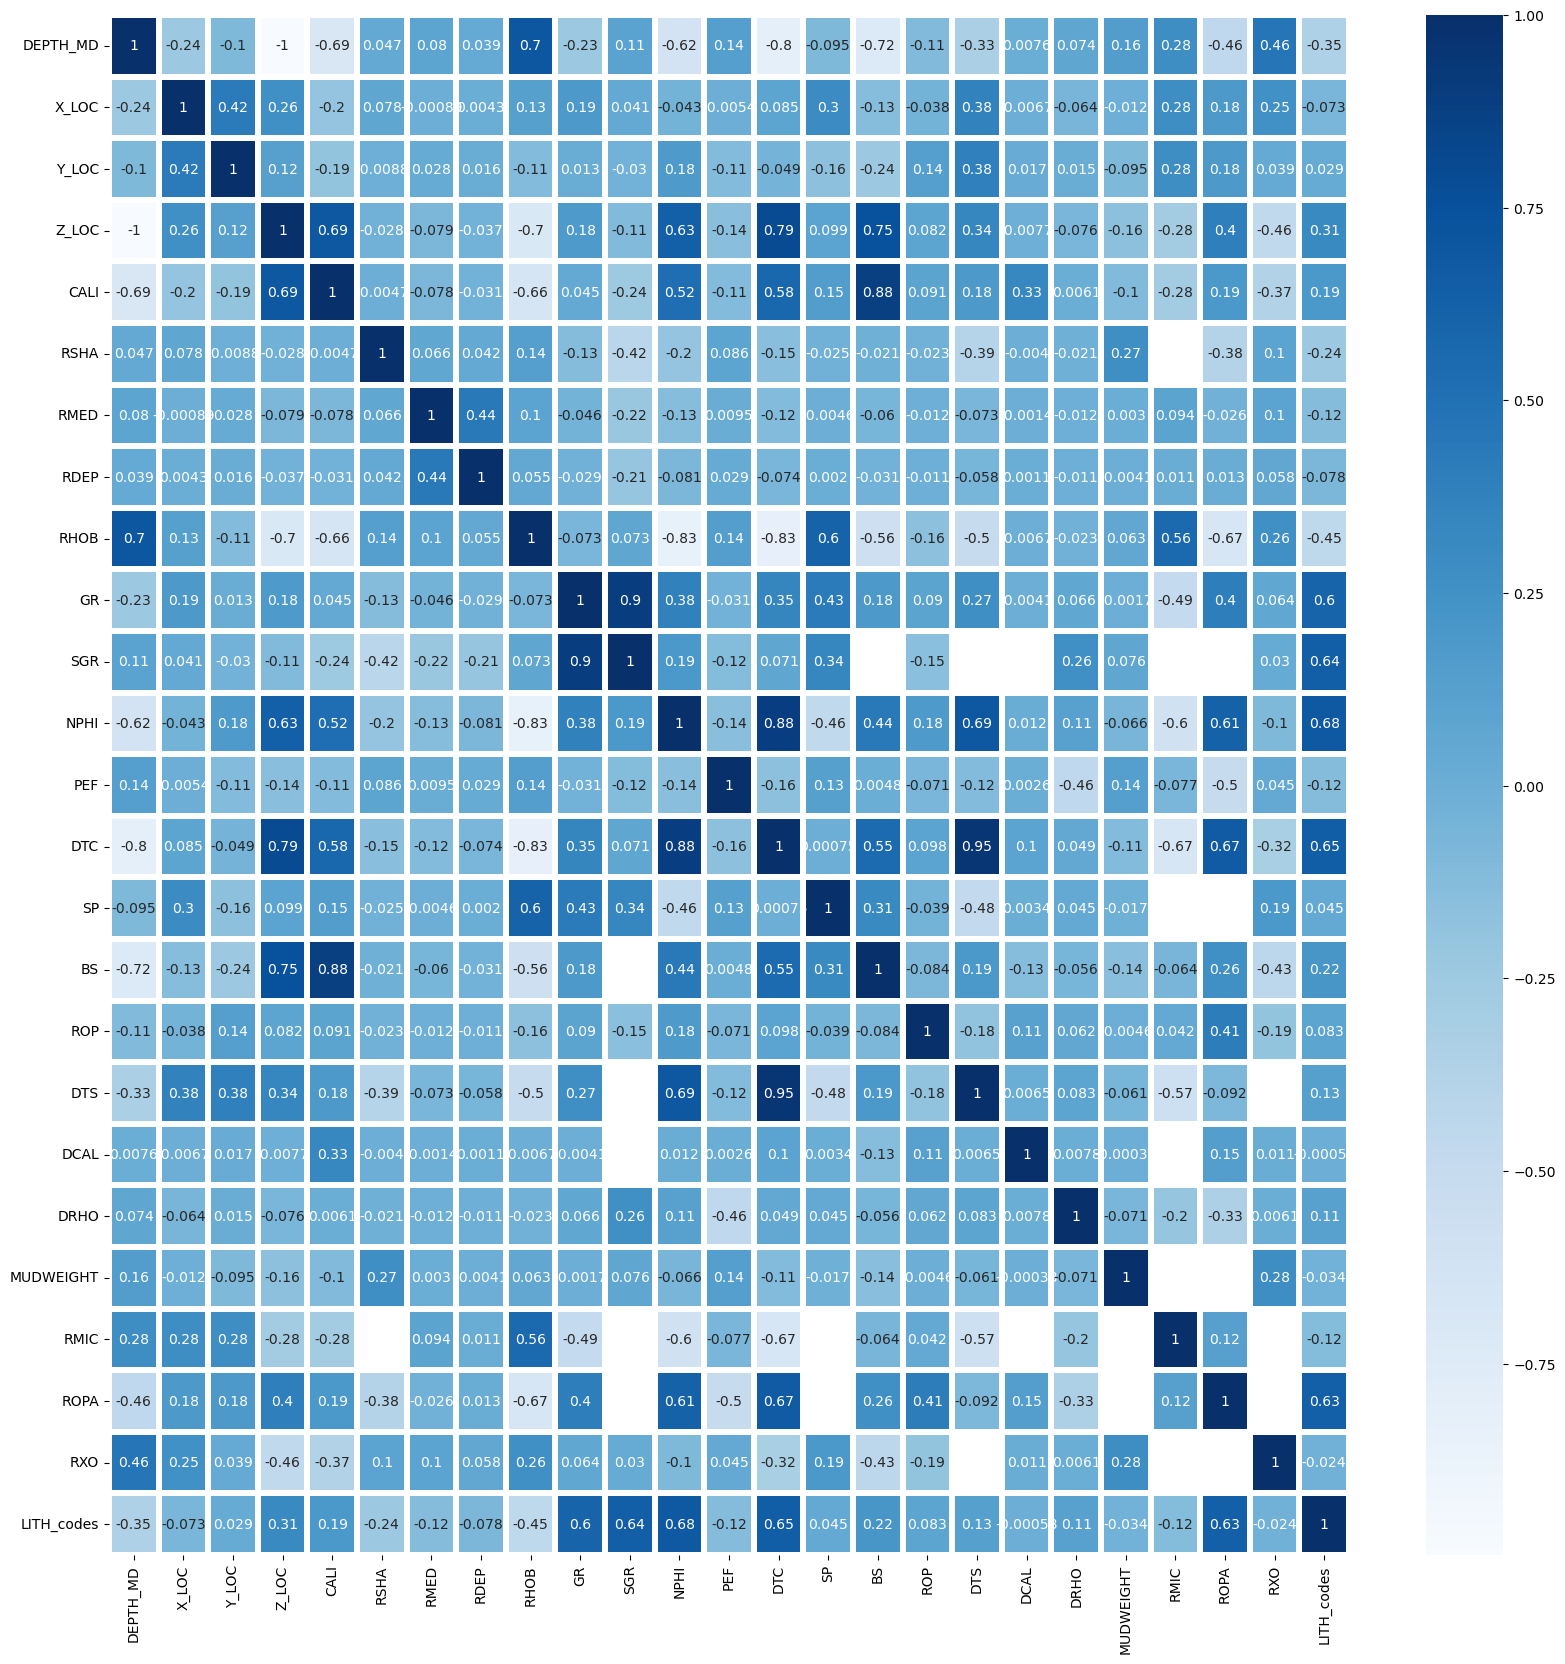

In [20]:
# Check the correlation of the numerical columns
num_cols = data.select_dtypes(exclude='object')
corr =num_cols.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,cmap='Blues',lw=3)
plt.interactive(True)
plt.show()

- From the above heatmap:
    - the actual relationship between the columns are shown the correlation heatmap

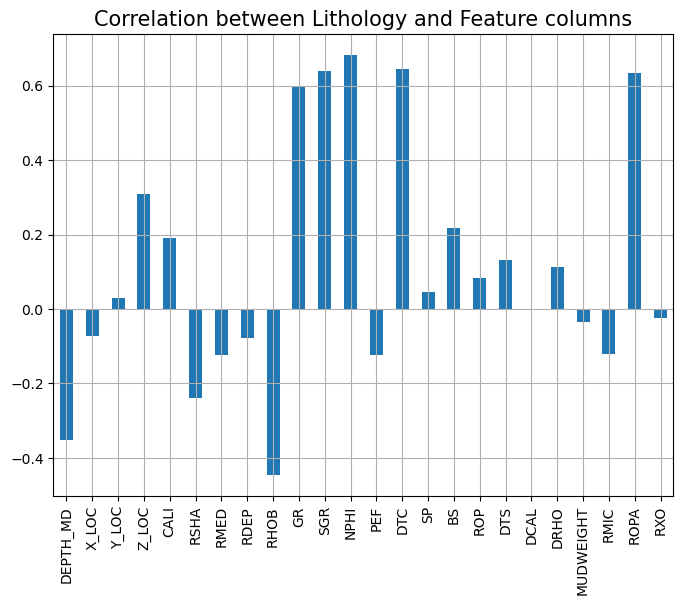

In [21]:
# Visualize the correlation between the target column and feature columns
corr =num_cols.corr()['LITH_codes'][:24]
plt.figure(figsize=(8,6))
corr.plot(kind='bar')
plt.title('Correlation between Lithology and Feature columns',fontsize=15)
plt.interactive(True)
plt.grid(True)
plt.show()

- From the above plot:
    - DEPTH_MD, X_LOC, RSHA, RMED, RDEP, RHOB, PEF, MUDWEIGHT, RMIC, RXO have negative correlation or inverse relationship with the LITH column

# Feature Engineering

#### drop unnecessary columns and columns with >= 50% missing values

In [22]:
# drop unnecessary columns and columns with >= 50% missing values
data.drop(['WELL','GROUP','FORMATION','RXO','ROPA','RMIC','DCAL','DTS','SGR','RSHA'],axis=1,inplace=True)

- The following columns has no significant effect of the target column:
    - WELL, GROUP, FORMATION
    - And all columns with >= 50 % missing values

In [23]:
# check the remaining columns
data.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RMED', 'RDEP', 'RHOB',
       'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DRHO', 'MUDWEIGHT',
       'LITH', 'LITH_codes'],
      dtype='object')

#### Treating missing values

In [24]:
# treat missing values
def fill_missing_with_median(df):
    for col in df.columns:
        if df[col].dtype in ['float64','int64']:
            median = df[col].median() # using median imputation
            df[col].fillna(median, inplace=True)
        else:
            mode =df[col].mode()[0] # mode imputation for categorical columns
            df[col].fillna(mode,inplace=True)
            
    return df
            


- Fill the rest of the missing values with median value of each column,
     - we don't want our data to affected by the outliers in it thats why we used median instead mean.
     - Median is the middle value and its not affect by outliers

In [25]:
data= fill_missing_with_median(data)

In [26]:
# check missing values again
data.isna().sum()

DEPTH_MD      0
X_LOC         0
Y_LOC         0
Z_LOC         0
CALI          0
RMED          0
RDEP          0
RHOB          0
GR            0
NPHI          0
PEF           0
DTC           0
SP            0
BS            0
ROP           0
DRHO          0
MUDWEIGHT     0
LITH          0
LITH_codes    0
dtype: int64

#### Removing outliers

In [27]:
## remove outliers
def remove_outliers(df):
    for col in df.columns:
        if df[col].dtypes !='object':
            q1,q3 = df[col].quantile([0.25,0.75])
            iqr = q3-q1
            lower = q1-1.5*iqr
            upper = q3+1.5*iqr
            df[col] = np.where(df[col]<lower,lower,df[col])
            df[col] = np.where(df[col]>upper,upper,df[col])
    return df

In [28]:
data = remove_outliers(data)

# Prepare the data for ML

In [29]:
# selecting features and target
# X = features
# Y = target

X = data.drop(['LITH_codes','LITH'],axis =1)
Y = data['LITH']

In [30]:
# display sample of X, features
X.sample(4)

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,MUDWEIGHT
59928,626.983790,444151.7188,6435549.5,-601.940918,19.063101,1.134513,1.240453,2.162121,106.304268,0.382014,3.780121,160.354446,76.479698,12.250001,20.730263,0.003215,0.137800
73853,2743.583790,444171.7188,6435572.0,-2718.002686,8.664100,2.500751,2.798796,2.572613,17.701838,0.101503,3.937280,65.097855,112.036675,12.250001,2.670639,-0.002369,0.155774
100189,1087.537201,474567.7500,6436487.0,-1060.523438,13.116845,0.998200,0.773420,2.162121,59.856789,0.382014,3.780121,198.873352,49.275471,12.250001,7.196176,0.003215,0.152180
94065,2734.629599,460454.7188,6453745.5,-2694.064697,8.568469,1.679074,2.259833,2.532613,124.248276,0.251538,3.521391,84.069099,70.282761,12.250001,25.170000,0.008423,0.170153


In [31]:
# display sample of target
Y.sample(5)

67038               Shale
88639               Shale
114782    Sandstone/Shale
68071               Shale
110897             Halite
Name: LITH, dtype: object

In [32]:
print(X.shape)
print(Y.shape)

(133198, 17)
(133198,)


## Normalize the data

In [33]:
## Use MinMaxScaler to standardize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # scale X input data between 0 and 1 
X = scaler.fit_transform(X)


# Train Test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# divide the data into train and test split
# train = 80%, 
# test = 20%
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42,stratify=Y)

# Build the ML models

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
rf = MLPClassifier()
#train the rf model
rf.fit(x_train,y_train)
rf_pred =rf.predict(x_test)
print("Test score",accuracy_score(y_test,rf_pred))
print("Train score:",rf.score(x_train,y_train))
print('='*60)
print("Classification Report:")

print(classification_report(y_test,rf_pred))

#### RandomForestClassifier

In [65]:
rf = RandomForestClassifier()
#train the rf model
rf.fit(x_train,y_train)
rf_pred =rf.predict(x_test)
print("Test score",accuracy_score(y_test,rf_pred))
print("Train score:",rf.score(x_train,y_train))
print('='*60)
print("Classification Report:")

print(classification_report(y_test,rf_pred))

Test score 0.9710585585585586
Train score: 1.0
Classification Report:
                 precision    recall  f1-score   support

      Anhydrite       0.96      0.99      0.97        75
          Chalk       0.98      0.97      0.98      1026
           Coal       0.80      0.73      0.76        11
       Dolomite       0.91      0.78      0.84        37
         Halite       1.00      1.00      1.00       863
      Limestone       0.96      0.93      0.94      2382
           Marl       0.96      0.94      0.95       994
      Sandstone       0.96      0.96      0.96      3159
Sandstone/Shale       0.91      0.83      0.87      1315
          Shale       0.98      0.99      0.98     16478
           Tuff       0.94      0.93      0.93       300

       accuracy                           0.97     26640
      macro avg       0.94      0.91      0.93     26640
   weighted avg       0.97      0.97      0.97     26640



### ExtraTreesClassifier

In [58]:
pd.crosstab(y_test,ETC_pred)

col_0,Anhydrite,Chalk,Coal,Dolomite,Halite,Limestone,Marl,Sandstone,Sandstone/Shale,Shale,Tuff
LITH,,,,,,,,,,,
Anhydrite,73,0,0,0,0,1,0,0,0,1,0
Chalk,0,1010,0,0,0,14,2,0,0,0,0
Coal,0,0,10,0,0,0,0,0,0,1,0
Dolomite,3,0,0,29,0,0,0,0,1,4,0
Halite,0,0,0,0,863,0,0,0,0,0,0
Limestone,0,11,0,0,0,2238,18,8,2,103,2
Marl,0,2,0,0,0,33,948,1,1,9,0
Sandstone,0,0,1,0,0,1,1,3054,41,58,3
Sandstone/Shale,0,0,1,2,0,7,0,77,1122,106,0


In [54]:
ETC = ExtraTreesClassifier()
#train the rf model
ETC.fit(x_train,y_train)
ETC_pred =ETC.predict(x_test)
print("Test score",accuracy_score(y_test,ETC_pred))
print("Train score:",ETC.score(x_train,y_train))
print('='*60)
print("Classification Report:")
print(classification_report(y_test,ETC_pred))

Test score 0.9755630630630631
Train score: 1.0
Classification Report:
                 precision    recall  f1-score   support

      Anhydrite       0.96      0.97      0.97        75
          Chalk       0.99      0.98      0.99      1026
           Coal       0.83      0.91      0.87        11
       Dolomite       0.94      0.78      0.85        37
         Halite       1.00      1.00      1.00       863
      Limestone       0.97      0.94      0.95      2382
           Marl       0.97      0.95      0.96       994
      Sandstone       0.96      0.97      0.96      3159
Sandstone/Shale       0.93      0.85      0.89      1315
          Shale       0.98      0.99      0.99     16478
           Tuff       0.95      0.95      0.95       300

       accuracy                           0.98     26640
      macro avg       0.95      0.94      0.94     26640
   weighted avg       0.98      0.98      0.98     26640



In [67]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix

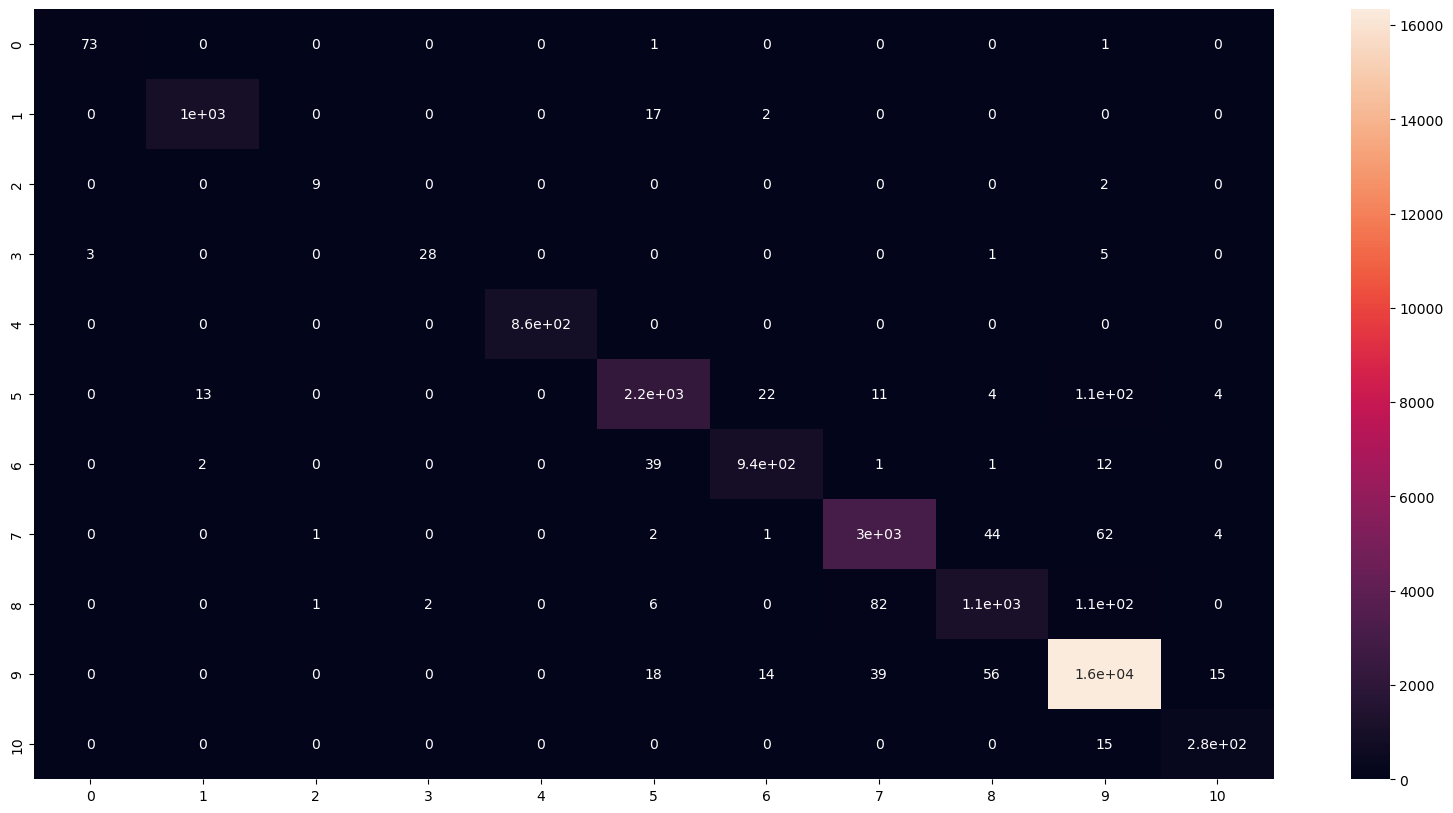

In [68]:
cm = confusion_matrix(y_test,ETC_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True,)
plt.show()

### Save the best model

* ExtraTreesClassifier model is the best model with accuracy of 99%

In [87]:
import joblib

In [88]:
# save scaler
joblib.dump(scaler,'Lith_Scaler.pkl')
# save model
joblib.dump(ETC,'LITH_ExtraTC_Model.pkl')

['LITH_ExtraTC_Model.pkl']

# Load Validation data

In [47]:
val_data  = pd.read_csv("xeek_subset_validation_dataset.csv")

In [48]:
val_data.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,LITH
0,16/11-1 ST3,2234.985201,NaN,NaN,NaN,VESTLAND GP.,Sandnes Fm.,12.656686,0.854845,NaN,...,NaN,NaN,0.010767,1.378004,NaN,NaN,NaN,30000,1.0,NaN
1,16/11-1 ST3,2235.137201,NaN,NaN,NaN,VESTLAND GP.,Sandnes Fm.,12.684051,0.411684,NaN,...,NaN,NaN,0.019468,1.378004,NaN,NaN,NaN,30000,1.0,NaN
2,16/11-1 ST3,2235.289201,NaN,NaN,NaN,VESTLAND GP.,Sandnes Fm.,12.590643,0.643569,NaN,...,NaN,NaN,0.024948,1.378004,NaN,NaN,NaN,30000,1.0,NaN
3,16/11-1 ST3,2235.441201,NaN,NaN,NaN,VESTLAND GP.,Sandnes Fm.,12.491283,1.677133,NaN,...,NaN,NaN,0.037594,1.378004,NaN,NaN,NaN,30000,1.0,NaN
4,16/11-1 ST3,2235.593201,NaN,NaN,NaN,VESTLAND GP.,Sandnes Fm.,12.480782,1.026189,NaN,...,NaN,NaN,0.019175,1.378004,NaN,NaN,NaN,30000,1.0,NaN


In [49]:
val_data.shape

(25460, 30)

In [50]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25460 entries, 0 to 25459
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   WELL                               25460 non-null  object 
 1   DEPTH_MD                           25460 non-null  float64
 2   X_LOC                              20724 non-null  float64
 3   Y_LOC                              20724 non-null  float64
 4   Z_LOC                              20724 non-null  float64
 5   GROUP                              25460 non-null  object 
 6   FORMATION                          24069 non-null  object 
 7   CALI                               25460 non-null  float64
 8   RSHA                               612 non-null    float64
 9   RMED                               20672 non-null  float64
 10  RDEP                               20724 non-null  float64
 11  RHOB                               20835 non-null  flo

In [51]:
# drop unnecessary columns and columns with >= 50% missing values
val_data.drop(['WELL','GROUP','FORMATION','FORCE_2020_LITHOFACIES_LITHOLOGY','FORCE_2020_LITHOFACIES_CONFIDENCE','RXO','ROPA','RMIC','DCAL','DTS','SGR','RSHA'],axis=1,inplace=True)

In [52]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25460 entries, 0 to 25459
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPTH_MD   25460 non-null  float64
 1   X_LOC      20724 non-null  float64
 2   Y_LOC      20724 non-null  float64
 3   Z_LOC      20724 non-null  float64
 4   CALI       25460 non-null  float64
 5   RMED       20672 non-null  float64
 6   RDEP       20724 non-null  float64
 7   RHOB       20835 non-null  float64
 8   GR         25460 non-null  float64
 9   NPHI       21324 non-null  float64
 10  PEF        20079 non-null  float64
 11  DTC        25321 non-null  float64
 12  SP         0 non-null      float64
 13  BS         25413 non-null  float64
 14  ROP        25437 non-null  float64
 15  DRHO       21054 non-null  float64
 16  MUDWEIGHT  4727 non-null   float64
 17  LITH       0 non-null      float64
dtypes: float64(18)
memory usage: 3.5 MB
